In [22]:
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
import sys
import os
import folium
import osmnx as ox
import branca.colormap as cm

sys.path.insert(0, os.path.abspath('../src'))
from plot import plot_tracks

## Test individual tracks

In [23]:
with open('../config.yaml') as file:
  params= yaml.safe_load(file)

params['raw_data_folder'] = "raw/20231210/"
params['preprocessed_data_folder'] = "preprocessed/20231210/"

preprocessed_data_folder = params['data_folder'] + params['preprocessed_data_folder']

In [24]:
df_tracks = pd.read_pickle(preprocessed_data_folder + 'pp_merged.pkl')
df_robot = pd.read_pickle(preprocessed_data_folder + 'pp_robot.pkl')
df_orientations = pd.read_pickle(preprocessed_data_folder + 'pp_orientations.pkl')

## Plot the track for Paper

In [25]:
graph_file = params['data_folder'] + "preprocessed/" + 'freiberg_dom.gpkg'
G_filtered = ox.load_graphml(graph_file)

def is_crossing(G, lat, lon, distance=10):
    _, dist = ox.nearest_nodes(G, lon, lat, return_dist=True)
    return dist

df_robot["crossing_dist"] = df_robot.apply(
    lambda x: is_crossing(G_filtered, x["latitude"], x["longitude"]), axis=1)

In [26]:
df_robot["crossing_dist"].max()

64.70060056964692

In [27]:
center = [df_robot['latitude'].mean(), df_robot['longitude'].mean()]

linear =  cm.LinearColormap(["red", "yellow", "green"], vmin=0, vmax=65)

mymap = folium.Map(location=center, zoom_start=18, max_zoom=20, attr='osm.com')

n=3

# Marker für jede Zeile in GNSS-Daten hinzufügen
for index, row in df_robot.iloc[n-1::n].iterrows():

    if row['crossing_dist'] >= 8:
        color = linear(row['crossing_dist'])
    else:
        color = "black"

    folium.Circle([row['latitude'], row['longitude']],
                  #fill=True,
                  radius=3,
                  color=color,
                  fill_color=color,
                  fill_opacity=1.0,
                  ).add_to(mymap)


# Karte anzeigen
mymap.save('map.html')
mymap

## Plot single scenario

In [28]:
time_start = pd.Timestamp('2023-12-10 11:26:48')
time_start = pd.Timestamp('2023-12-10 11:29:05')
#time_start = pd.Timestamp('2023-12-10 11:34:15')
#time_end = time_start + pd.Timedelta(seconds=340)
time_end = time_start + pd.Timedelta(seconds=20)
df = df_tracks[(df_tracks['gnss.timestamp'] >= time_start) & \
               (df_tracks['gnss.timestamp'] <= time_end) & \
                (df_tracks['obj.label_id_unique']<19999) & \
                (df_tracks['pose_valid'])]

df_robot_tracks = df_robot[(df_robot['timestamp'] >= time_start) & \
                           (df_robot['timestamp'] <= time_end)]

df.shape

(117, 51)

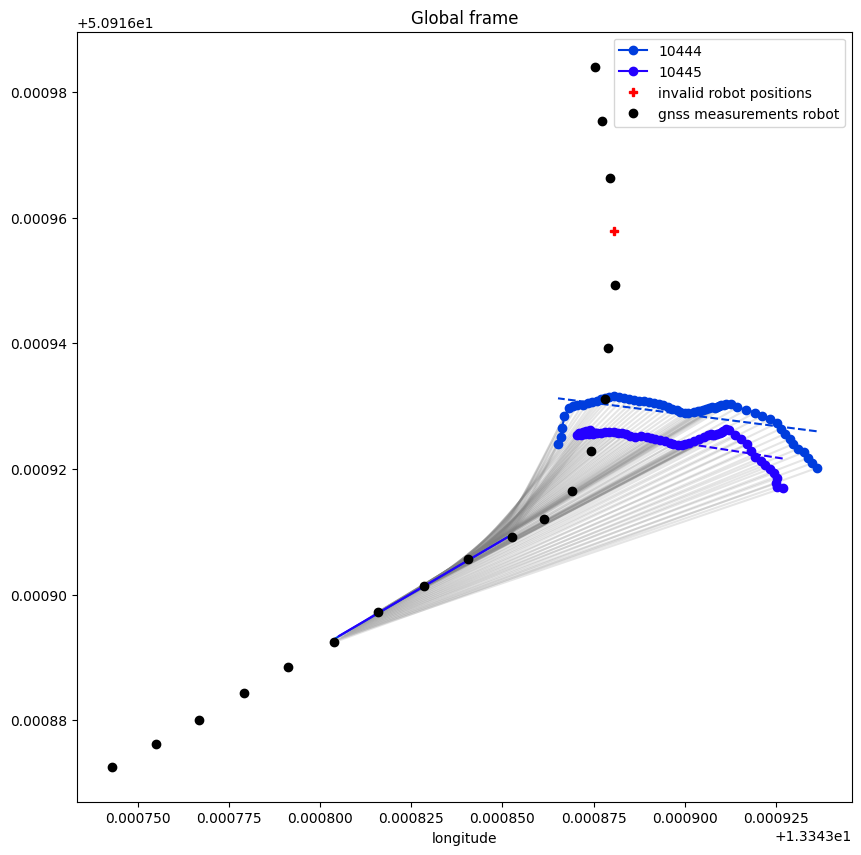

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

for index, row in df.iterrows():
   ax.plot([row['robot_longitude'], row['longitude_human']], 
           [row['robot_latitude'], row['latitude_human']], '-', 
           color = 'gray', alpha=0.2)

# Person
for id in df['obj.label_id_unique'].unique():
    df_id = df[df['obj.label_id_unique'] == id]

    if df_id.valid_track.iloc[0]:
        marker = 'o'
        label =  id
    else:
        marker = 'x'
        label = f'{id} invalid'
    ax.plot(df_id['longitude_human'], df_id['latitude_human'], 
            color=df_id['color'].iloc[0], marker=marker, 
            label=label)
    
    aux= df_orientations[df_orientations["obj.label_id_unique"]==id]
    ax.plot([aux.robot_begin_longitude.values[0],
             aux.robot_end_longitude.values[0]],
            [aux.robot_begin_latitude.values[0],
             aux.robot_end_latitude.values[0]],
             color=df_id['color'].iloc[0])
    
    ax.plot([aux.human_begin_longitude.values[0],
             aux.human_end_longitude.values[0]],
            [aux.human_begin_latitude.values[0],
             aux.human_end_latitude.values[0]],
             color=df_id['color'].iloc[0], linestyle='--')

# Robots movements
df_robot_tracks[df_robot_tracks['pose_valid']==False]\
                .plot(x='longitude', y='latitude', 
                    ax=ax, label='invalid robot positions', 
                    color='red', marker='P', linestyle='None')

df_robot_tracks[df_robot_tracks['pose_valid']]\
        .plot(x='longitude', y='latitude', 
              ax=ax, label='gnss measurements robot', 
              color='black', marker='o', linestyle='None')
df_tracks['gnss.timestamp']
ax.set_title(f'Global frame')
ax.legend()

array([<Axes: title={'center': 'human_speed_est'}>], dtype=object)

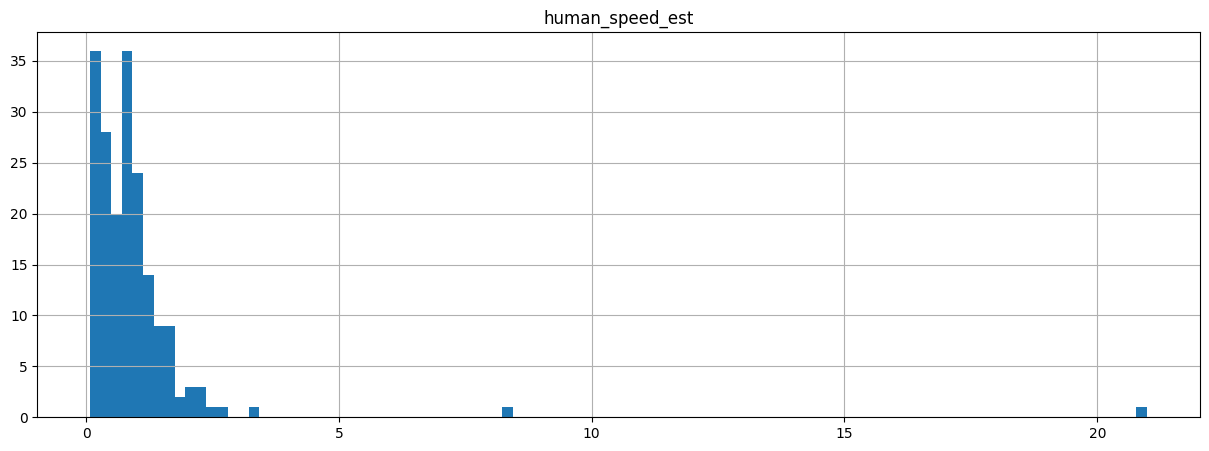

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
df_orientations.hist(column='human_speed_est', bins=100, ax=ax)

205
$angle$=3.10
$angle$=0.23
$angle$=0.07
$angle$=3.06
$angle$=3.05
$angle$=2.66
$angle$=2.38
$angle$=2.27
$angle$=2.70
$angle$=0.46
$angle$=0.26
$angle$=1.38
$angle$=0.44
$angle$=0.05
$angle$=2.44
$angle$=0.65
$angle$=2.92
$angle$=3.05
$angle$=1.33
$angle$=0.42
$angle$=0.28
$angle$=0.07
$angle$=1.79
$angle$=2.94
$angle$=0.17
$angle$=2.30
$angle$=0.17
$angle$=2.16
$angle$=2.73
$angle$=0.59
$angle$=3.12
$angle$=2.32
$angle$=0.08
$angle$=0.23
$angle$=1.63
$angle$=3.10
$angle$=2.18
$angle$=0.39
$angle$=1.70
$angle$=0.05
$angle$=3.07
$angle$=2.69
$angle$=2.96
$angle$=0.14
$angle$=2.93
$angle$=3.12
$angle$=0.97
$angle$=2.48
$angle$=3.05
$angle$=0.05
$angle$=2.61
$angle$=0.90
$angle$=3.05
$angle$=1.92
$angle$=2.89
$angle$=3.09
$angle$=2.12
$angle$=3.10
$angle$=1.21
$angle$=0.93
$angle$=2.98
$angle$=2.48
$angle$=2.74
$angle$=0.06


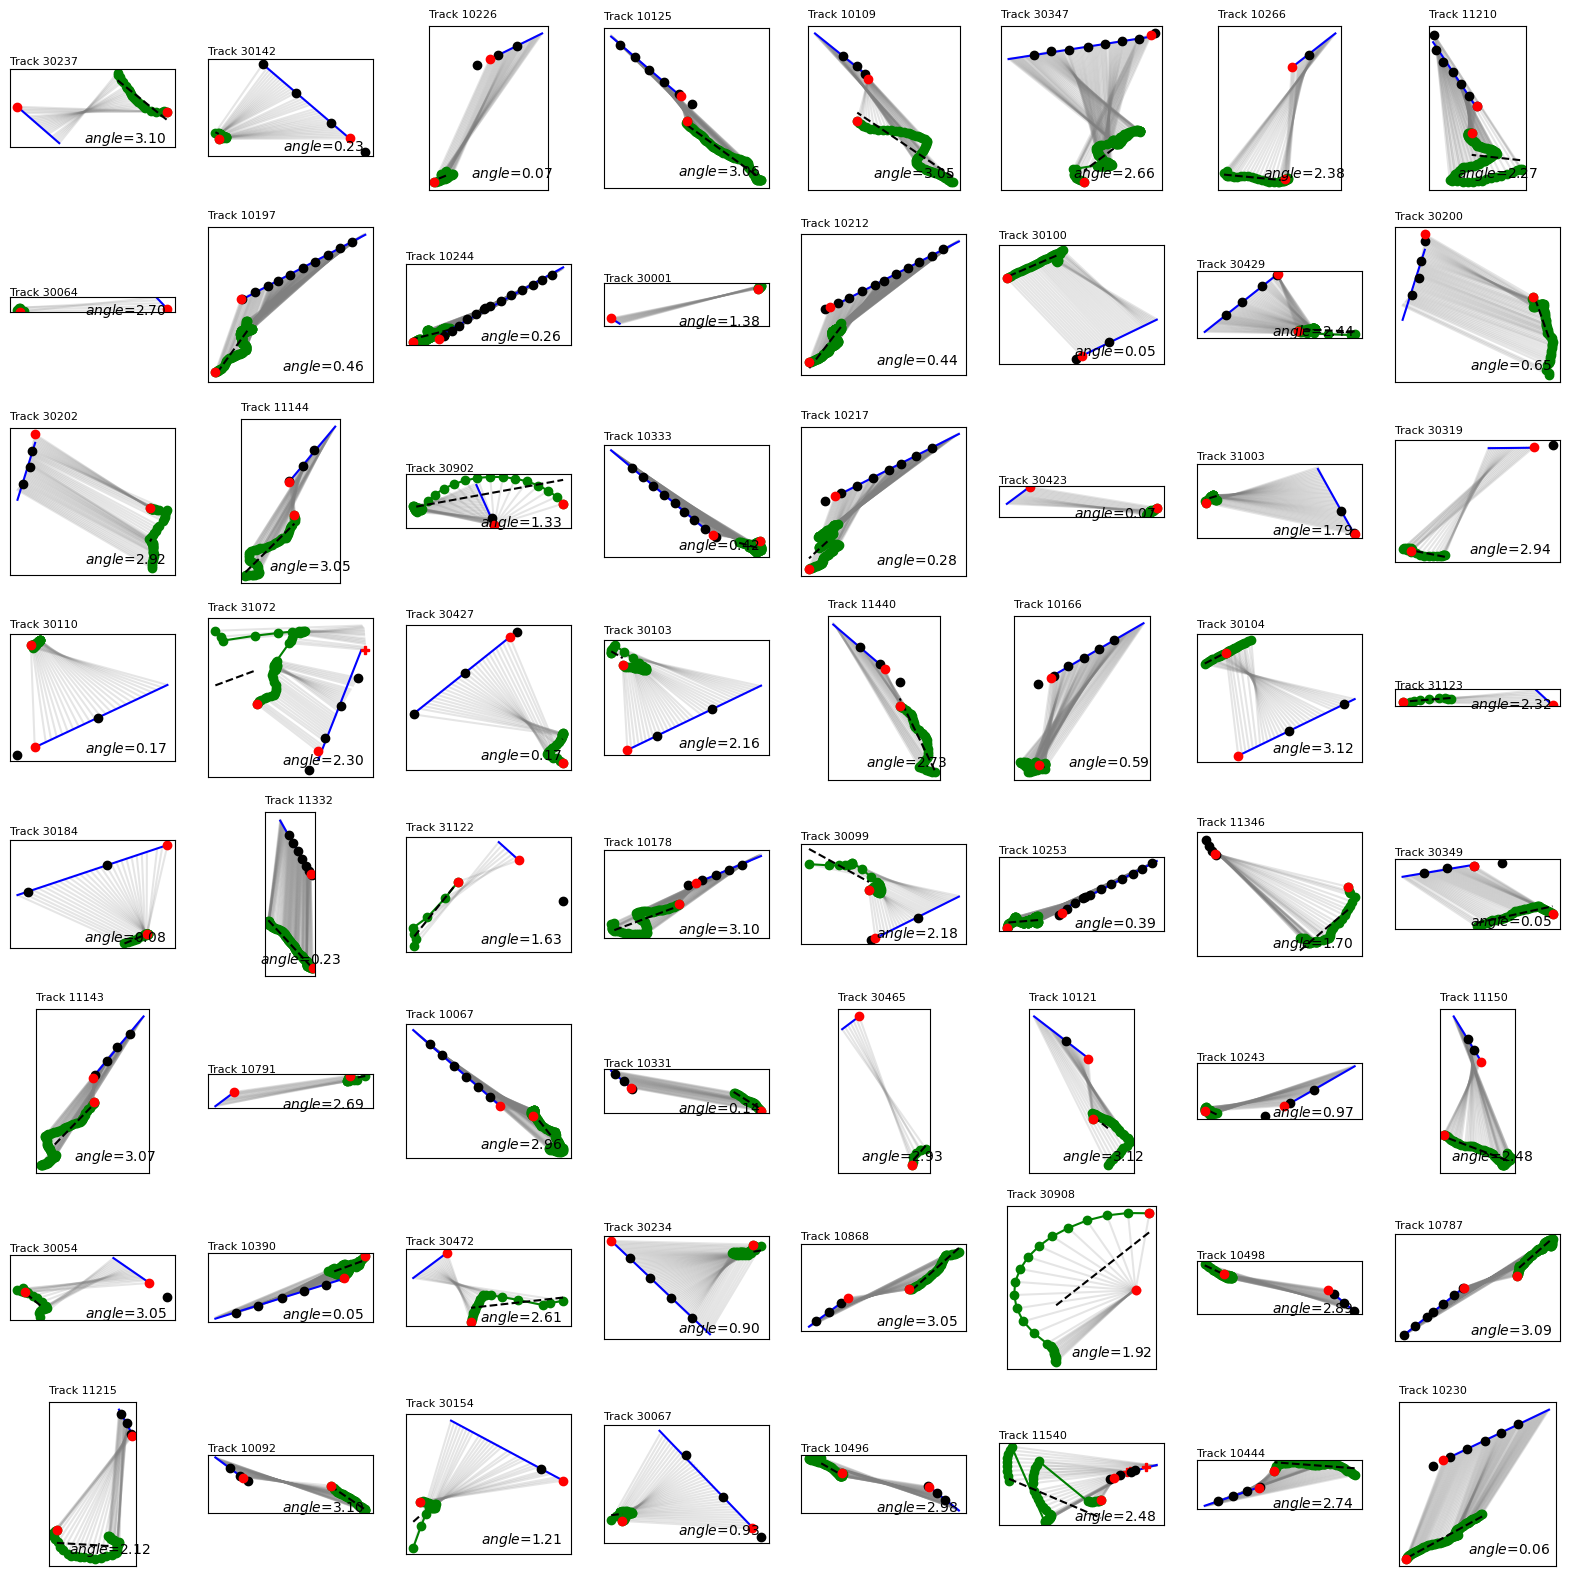

In [32]:
fig, axes = plt.subplots(8, 8, figsize=(20,20))

ids = df_tracks[(df_tracks['obj.label_id_unique']<19999)]['obj.label_id_unique'].unique().tolist()
ids = df_tracks['obj.label_id_unique'].unique().tolist()
print(len(ids))
relevant_ids = random.sample(ids, 64)

for i, ax in enumerate(axes.flatten()):
    # Person
    id = relevant_ids[i]
    plot_tracks(ax, id, True, df_tracks, df_robot, df_orientations);
